# Essential Tasks and Libraries for Scientific Python # 

Now that we have some experience with Python as a language its time to learn how to apply that to do useful scientific work. We're going to break this process down into several big chunks and learn the libraries and methods that are used for those chunks one at a time. Our ultimate goal will be to put these pieces back together and have a flow that takes us from raw data to usable results.

## [Numeric Data with Numpy](https://docs.scipy.org/doc/numpy/) ##
Numpy is the default library for numeric computations in Python. When we went over the different types we saw that Python's built in numeric types and structures are very flexible at the cost of speed and rigor. For scientific data we will almost always want that speed and rigor. Additionally Numpy lets us use a type of programming we have not seen yet, matrix operation. Matrix operations allow us to very efficiently do operations on elements of arrays or vectors of data. Not only is this more concise than doing similar operations by looping over elements because of numpy it is a great deal faster.

In [1]:
import numpy as np

# Creates a numpy array of integers 0 to 10,000
a = np.arange(0,10000)

# Sum this array using pythons default method or numpys matrix operations

print 'Built-In Array Sum - uses itteration'
%timeit sum(a)

print '\nNumpy Array Sum - uses numpy matrix operations'
%timeit np.sum(a)

Built-In Array Sum - uses itteration
1000 loops, best of 3: 619 µs per loop

Numpy Array Sum - uses numpy matrix operations
The slowest run took 9.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.48 µs per loop


### Numpy ND-Array ###
Numpy only has one data structure we need to consider, the N-Dimensional array or ndarray. Ndarrays are mutable sequences, they have a fixed size and may only contain variables of a single numpy data type (dtype). They are called N-dimensional arrays because they may have an arbitrary number of dimensions. 

#### Basic Properties ####

**shape** - The size of the array along each dimension, stored as a tuple of length n

**ndim** - The number of dimensions or axes in the ndarray (1 to n)

**dtype** - The data type of all array elements

#### Array Creation ####

There are two general ways to create ndarrays. You can cast python lists or tuples to ndarrays or you can use numpy functions which return ndarrays by default. When casting lists or tuples, nested structures will be turned into multi-dimensional arrays. The data-type of the array will be automatically determined and is set to the highest priority numpy type that would be cast from any of the values in the list. (ex: a list of mixed floats and ints would be cast to an ndarray with dtype np.float). If any value in the list cannot be converted to a numpy type, for instance a string, python will throw an error.

In [2]:
import numpy as np

# Create 1-d arrays from lists or tuples
x = np.array([0,1,2,3])
y = np.array((4,5,6,7.0))

# Create 2-d arrays from nested structures
z = np.array( [[1,1,1],[2,2,2],[3,3,3]] )

print 'Shape: x={} y={} z={}'.format(x.shape, y.shape, z.shape)
print 'N-Dim: x={} y={} z={}'.format(x.ndim, y.ndim, z.ndim)
print 'D-Type: x={} y={} z={}'.format(x.dtype, y.dtype, z.dtype)

Shape: x=(4,) y=(4,) z=(3, 3)
N-Dim: x=1 y=1 z=2
D-Type: x=int64 y=float64 z=int64


#### Useful Array Creation Routines ####

Numpy provides a variety of routines to generate ndarrays with specific size and content, here are some of the most commonly used ones.

In [3]:
import numpy as np

# Default Arrays

# Zeros - creates an array of the given shape and type filled with zeros
a = np.zeros((2,2), dtype=np.int)

# Ones - creates an array of the given shape and type filled with ones
b = np.ones((2,2), dtype=np.int)

# Full - creates an array of the given shape and type filled with a specified value
c = np.full((2,2), 42.0, dtype=np.float)

# Numerical Range Arrays

# ARange - creates a 1d array of values on a specified interval with specified step-length
d = np.arange(10)    # default start is 0, default step is 1
e = np.arange(0,10,2)

# Linspace - creates a 1d array of evenly spaced values in a specified interval with a specified number of values
# very useful for graphing
f = np.linspace(0,10, num=5)

# Randomly Generated Arrays
#
# Numpy also has functions to create arrays with randomly filled values of different sorts
# this can be extremely useful for statistics and baseline comparisons

# Rand - returns an array of shape (n,n) filled with values randomly sampled from a uniform distribution between 0-1
g = np.random.rand(2,2)

# Randn - returns an array of shape (n,n) filled with values randomly sampled from the standard normal distribution
h = np.random.randn(2,2)

# RandInt - returns an array of shape (n,n) filled with random integers from a specified range
i = np.random.randint(4,8, size=(2,2))

# Specific Distributions
#
# Full List - http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions
#
# For more advanced use numpy can sample from a large array of different distribution types, this can be very 
# useful in statistics, distribution fitting and other purposes. 

# ChiSquare - samples from a chisquare distribution of n degrees of freedom
j = np.random.chisquare(2, size=4)

# Zipf - samples from a zipf distribution with distribution parameter a
k = np.random.zipf(2, size=4)

#### Indexing & Slicing ####

Numpy arrays can be indexed and sliced in the same way we can for other sequence objects. There are only a few minor differences we should note. There is improved syntax for indexing multi-dimensional arrays, item locations may also be specified matrix style with a comma seperated list of integers/slices. Rows are indexed first followed by columns.

*note: Both normal indexing and slicing of ndarrays returns a view into the original ndarray, this means it is a reference to the original not a copy and assigning to a slice or index will change the original.*

In [4]:
import numpy as np

# Creates a 4x3 ndarray of strings
a = np.array([['a','b','c'],['d','e','f'],['g','h','i'],['j','k','l']])
print 'Original NDArray'
print a

# Standard syntax for indexing nested/multidimensional sequences
# Row first followed by column
print '\nRow 0, Col 2 (standard syntax)'
print a[0][2]

# Numpy syntax for indexing multidimensional arrays
print '\nRow 0, Col 2 (numpy syntax)'
print a[0,2]

# Examples using slices

# All rows in first column
print '\nColumn 0'
print a[:,0]

# All columns in first row
print '\nRow 0'
print a[0,:]

# Bonus
# Every even row
print '\nEven Rows'
print a[::2, :]

Original NDArray
[['a' 'b' 'c']
 ['d' 'e' 'f']
 ['g' 'h' 'i']
 ['j' 'k' 'l']]

Row 0, Col 2 (standard syntax)
c

Row 0, Col 2 (numpy syntax)
c

Column 0
['a' 'd' 'g' 'j']

Row 0
['a' 'b' 'c']

Even Rows
[['a' 'b' 'c']
 ['g' 'h' 'i']]


#### Index & Mask Arrays ####

#### Index Arrays ####
Another useful technique I want to introduce you to is the concept of index arrays. When you need to extract multiple values from an ndarray we could just loop over the whole array and extract or change the values one by one. However this is highly inefficient. In numpy we can also pass ndarrays or other sequences of values (with the exception of tuples for reasons we won't go into) and use them to extract multiple values at once returning a new ndarray with our results.

*note: unlike indexing and slicing using index arrays returns a copy of the original array not a view, you cannot assign to the original*

In [5]:
import numpy as np

a = np.array([['a','b','c'],['d','e','f'],['g','h','i'],['j','k','l']])

# Index the first row using a list of indices
b = a[0, [0,2] ]
print b

# Index the first column using a list of indices
c = a[ [0,1], 0]
print c

# Index the 2d ndarray using two lists of indices
# The first list passed acts as the row index and the second is the column index
d = a[[0,1,2],[0,1,2]]
print d

['a' 'c']
['a' 'd']
['a' 'e' 'i']


#### Mask Arrays ####
Mask arrays are a special case that do not operate in the same manner as normal numerical indexing. Ndarrays may be indexed using an array of booleans with the same shape and dimensions as the original. It returns a 1d array of all values from the original where the value in the mask array was true. Mask arrays are quite often used as a filter to remove values from an array based on some condition. Lets do a simple example where we create a mask array to remove all outlier values from a dataset.

*note: like index arrays mask arrays return a copy not a view of the original array*

In [6]:
import numpy as np

# Create a 20x20 array of values drawn from a normal distribution
normal = np.random.randn(20,20)

# Defining outliers as any value 2 or more standard deviations from the mean
# Creates a mask array of booleans by applying a conditional to the original ndarray
# uses boolean or to merge both conditions then inverts with ~ (logical not)
mask = ~( (normal < -2) | (normal > 2) )

# Apply the mask array to our original
# removes outliers
no_out = normal[mask]

#### Array Math Operations ####
You may have noticed in the previous example that there was a single line where we created our mask array that did a LOT of work. The reason why numpy is so amazing for numerical data manipulation is because we can write simple functions, comparisons etc and very quickly apply them to an entire array. We can also perform fast operations between ndarrays. Because we are using numpy these operations are not only more concise but much faster. For most numerical data you should be using numpy arrays and its built in operations.

#### Scalar Operations ####
Scalar operations on matrices are ones that apply a single operation to all members of the ndarray. A simple example would be adding 1 to every value. A slightly more complex one you may often do is taking the mean and standard dev of a set of values then subtracting the mean and dividing by the std for every member of the set. All standard mathematical operations can be performed as scalars on ndarrays.

In [7]:
import numpy as np

# Create a 3x3 array of ints from 0-8
a1 = np.arange(9).reshape((3,3))

# Double all values
print a1 * 2

# Standardize all values
print (a1 - np.mean(a1))/np.std(a1)

# Bonus - It's simple to perform scalar operations on subsets of ndarrays using slices
# remember that slices return views so any operations done to them can be assigned to the original

# Multiply the first row by 10 
a1[0,:] = a1[0,:] * 10
print a1

[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]
[[-1.54919334 -1.161895   -0.77459667]
 [-0.38729833  0.          0.38729833]
 [ 0.77459667  1.161895    1.54919334]]
[[ 0 10 20]
 [ 3  4  5]
 [ 6  7  8]]


#### Elementwise Operations ####
The default mode when using mathematical operations between two or more ndarrays is performing elementwise operations. This may surprise more math focused souls who would expect matrix operations. I won't cover matrix operations here but if you need to use them you can either use numpy functions that perform them or the matrix subclass of ndarrays. All standard math operations can be used but the shape of the arrays needs to match. We'll discuss what happens with non-matched arrays shortly.

In [8]:
import numpy as np

a1 = np.ones(10)
a2 = np.arange(10)

print a1 + a2
print a1 * a2

# Bonus: we can even mix elementwise and scalar operations
print (a1 + a2) + 10

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 11.  12.  13.  14.  15.  16.  17.  18.  19.  20.]


When the shape of the arrays are not matched the broadcasting rules become a little more complicated. In the case where the two arrays are matched in shape on all dimensions except for a single 'trailing dimension' the operations will be repeated across the trailing dimension. The simplest case is operations between a 2d array and a 1d array with the same shape on one axis. Take a (10,10) array added with a (1,10) array. The (10,1) array would be added to the first row of the (10,10) then the second and so on. The same pattern occurs for higher dimensional arrays but any shape mismatch other than a single trailing dimesion results in an error.

In [9]:
import numpy as np

a1 = np.ones(100).reshape(10,10)
a2 = np.arange(10).reshape(1,10)

print a1*a2

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]]


#### Function Toolbox ####
Numpy functions behave identically to normal python functions with one important difference. They can take numpy arrays as arguments. There are two general types of numpy functions, functions like sum or mean that will take an array as input and return a single value and functions like round that apply to every element. I won't go over every possible useful function but here's the list of functions available and I'll show you an example of how they can be used.

[Numpy Math Functions](http://docs.scipy.org/doc/numpy/reference/routines.math.html)

[Numpy Stats Functions](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html)

[Numpy Linear Algebra Functions](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

[Numpy Logic Functions](http://docs.scipy.org/doc/numpy/reference/routines.logic.html)

[Numpy Array Manipulation Functions](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)

These functions are optimized for use with numpy arrays and should be used over their built-in equivalents.

In [10]:
import numpy as np

# Lets use numpy to create a simulated distribution of iq scores
# we assume that the mean is 100, the standard deviation is 10 and the distribution is normal

# Create two sample arrays from the normal distribution
# One is very large 10,000 and the other is small 10
big = np.random.randn(10000)
little = np.random.randn(10)

# Using scalar operations scale both arrays to match an iq distribution
big = (big*10) + 100
little = (little*10) + 100

# Calculate some simple statistics for each distribution
print 'Small Sample: mean={} median={} std={}'.format(np.mean(little), np.median(little), np.std(little))
print 'Big Sample: mean={} median={} std={}'.format(np.mean(big), np.median(big), np.std(big))

Small Sample: mean=103.810675772 median=103.923926599 std=11.3402902476
Big Sample: mean=100.090128697 median=100.016784415 std=9.92271667167


## [Everything Data with Pandas](http://pandas.pydata.org/pandas-docs/stable/) ##

Pandas is a library for efficiently and expressively manipulating structured data in Python. I like to describe Pandas as an awesome wrapper for numpy ndarrays. Pandas provides a powerful dataframe object, a two dimensional, column-based data structure with labeling for rows and columns. If you have ever used R's dataframe or excel style spreadsheet programs you should be familiar with this kind of structure. Pandas makes it very easy to organize, aggregate, subset and manipulate data. For scientific data Pandas will be your primary means of inputing, outputing and structuring data. 

### Series ###
A series is a one dimensional array-like object that contains a numpy array and an attached array of labels called the **index**. Each index label is associated with a value in the array. A pandas series is quite similar to a dictionary with the additional restriction that the values must be compatible with a single numpy nd-array (no mixed types)

In [11]:
import pandas as pd

# Series declared from lists will create a 'default' index which is a numeric range from 0-N
default = pd.Series([4,5,6,7,8,9])
print 'Series with Default Index'
print default

# Series declared from lists will create a 'default' index which is a numeric range from 0-N
indexed = pd.Series([4,5,6,7,8,9], index=['a','b','c','d','e','f'])
print '\nSeries with Index '
print indexed

Series with Default Index
0    4
1    5
2    6
3    7
4    8
5    9
dtype: int64

Series with Index 
a    4
b    5
c    6
d    7
e    8
f    9
dtype: int64


#### Series Indexing ####
Pandas series can then be indexed using either the raw numeric index of each item or with their associated index values. We can use single values, index arrays or slices with either the numeric index or the series index.

In [13]:
import pandas as pd

# Series can also be created directly from dicts
ex = pd.Series({'a':10, 'b':9, 'c':8, 'd':7})
print ex

print '\nNumeric Indexing'
print ex[1]

print '\nUsing the Index'
print ex['a']

print '\nIndex Arrays with Numeric or Index'
print ex[[0,1]]
print ex[['a','b']]

print '\nSlices Using Numeric or Index'
print ex[0:3]
print ex['a':'c']

a    10
b     9
c     8
d     7
dtype: int64

Numeric Indexing
9

Using the Index
10

Index Arrays with Numeric or Index
a    10
b     9
dtype: int64
a    10
b     9
dtype: int64

Slices Using Numeric or Index
a    10
b     9
c     8
dtype: int64
a    10
b     9
c     8
dtype: int64


### The DataFrame ###
The dataframe is the primary data structure provided by Pandas. It is a tabular, spreadsheet like datastructure made up of one or more labeled columns which share an index. In essence it is a set of Pandas series with one shared index. It is very similar to the R data frame. Dataframes will use numpy arrays internally when possible so they are relatively fast.  

In [14]:
import pandas as pd

data = {'age':[12,34,23,52], 'income':[50,78,122,200],'pet':[0,1,1,0]}

# DataFrames can be created from dictionaries of equal length lists/numpy arrays
frame = pd.DataFrame(data)
print 'DF from dict, keys become column headers'
print frame

# Passing a list of columns allows you to specify a subset of columns to include
frame = pd.DataFrame(data, columns=['age','income'])
print '\nDF from dict, columns passed explicitly specify subset to use'
print frame

DF from dict, keys become column headers
   age  income  pet
0   12      50    0
1   34      78    1
2   23     122    1
3   52     200    0

DF from dict, columns passed explicitly specify subset to use
   age  income
0   12      50
1   34      78
2   23     122
3   52     200


#### Indexing DataFrames ####
DataFrames may be indexed in several ways. The column names act like a second index of the columns. We may specify the columns using dictionary style indexing or as an attribute of the dataframe. 

In [15]:
import pandas as pd

data = {'age':[12,34,23,52], 'income':[50,78,122,200],'pet':[0,1,1,0]}
frame = pd.DataFrame(data)

# Indexing with column names
# note: we cannot use slices to index columns with this syntax
print 'Indexing with ColumnNames'
print frame['pet']
print frame[['age','income']]

# Access columns as attributes
print '\nColumns as Attributes'
print frame.age

# Bonus - standard multidimensional indexing is often used to select rows and columns
print frame['income'][3]

Indexing with ColumnNames
0    0
1    1
2    1
3    0
Name: pet, dtype: int64
   age  income
0   12      50
1   34      78
2   23     122
3   52     200

Columns as Attributes
0    12
1    34
2    23
3    52
Name: age, dtype: int64
200


#### Indexing with IX ####
There is also a special indexing function "ix" that allows us to do numpy style indexing of the rows and columns. Columns may either be indexed using their names or their numeric index. (first column is 0, second is 1.. etc.)

In [16]:
import pandas as pd

data = {'age':[12,34,23,52], 'income':[50,78,122,200],'pet':[0,1,1,0]}
frame = pd.DataFrame(data)

# Select rows 0-3 for column 0
print frame.ix[0:3,0]

# Select all rows for column 'income'
print frame.ix[:,'income']

# Use slices to select a subset of columns
print frame.ix[:,'age':'income']

0    12
1    34
2    23
3    52
Name: age, dtype: int64
0     50
1     78
2    122
3    200
Name: income, dtype: int64
   age  income
0   12      50
1   34      78
2   23     122
3   52     200


#### Using Mask Arrays with Pandas ####

Dataframes may also be indexed using index and mask arrays allowing us to do various sorts of powerful subsettings very naturally. 

In [17]:
import pandas as pd

data = {'age':[12,34,23,52], 'income':[50,78,122,200],'pet':[0,1,1,0]}
frame = pd.DataFrame(data)

# Create a mask vector for all people with a pet
mask = frame['pet'] == 1

# Apply the mask vector to the pandas index to get all subjects with pets (preserves index values)
frame[mask]

# An abreviated version
frame[frame['pet']==1]

# Mean income for all people with a pet in one line
print np.mean(frame[frame['pet']==1]['income'])

100.0


#### Importing Data with Pandas ####
Pandas also has several very useful built in loading functions to parse data from common formats such as excel spreadsheets, csv's and etc. Pandas has some fairly powerful type inference when loading these formats and will automatically assign dtype to columns and use header rows as the names for column labels.

*note: a common source of errors is a single non-numeric value in a column which will cause the entire column to be read as strings.*

In [20]:
import pandas as pd

# Import a csv with data for a machiavellianism test
mach = pd.read_csv('./data/mach2/data.csv')
# List the automatically read columns
mach.columns

# Get the mean machiavellianism score and then the sub-means for men and women
mean = np.mean(mach['score'])
mean_m = np.mean(mach[mach['gender']==1]['score'])
mean_f = np.mean(mach[mach['gender']==2]['score'])

print 'Mean Machiavellianism Score = {}, Male Mean = {}, Female Mean={}'.format(mean, mean_m, mean_f)

Mean Machiavellianism Score = 65.8985253877, Male Mean = 67.6835782599, Female Mean=62.4240124972


read_csv, read_table and read_xlsx are the most commonly used import functions. read_table allows you to read in arbitrary delimited data by specifying the delimiters, read_xlsx can import excel formatted data but requires external libraries. All three have various arguments that can be passed to them to customize how the imported data is processed. The full range of pandas import functionality is beyond the scope of this tutorial but some commonly used examples are.

**nrows** - Specifies the number of rows to read in from the start of the file

**names** - List of names for columns, can override header row or be used when header is none

**sep**   - Seperator, specifies the delimiter to use, overrides default

**converters** - Dictionary of column names mapped to functions, applies the assigned function to every value in that column, very powerful for data cleaning

## [Graphing with Matplotlib](http://matplotlib.org/) ##

Matplotlib is the primary graphing library used with python, it is primarily 2d, but libraries for making 3d, animated and interactive plots are available. There are two ways of interfacing with matplotlib: the native matplotlib object methods and pyplot which provides a matlab like interface for interacing with graphics. I reccomend using the native matplotlib interface when possible as it makes the code more explicit and easier to read when working with multiple plots. 

### Make Matplotlib Pretty Again ###

A lot of people prefer graphics from R or ggplot because they find the default matplotlib graphs to be fairly ugly and basic even if they like the syntax. Luckily python allows a lot of customization so this can easily be fixed and tweaked to your hearts desire. There is a quick fix for this in a library called Seaborn. Just importing Seaborn overrides the default color palette for matplotlib when imported to make it 'prettier'. It also adds some additional tools for customizing asthetics and doing common graphing tasks like adding regression lines.

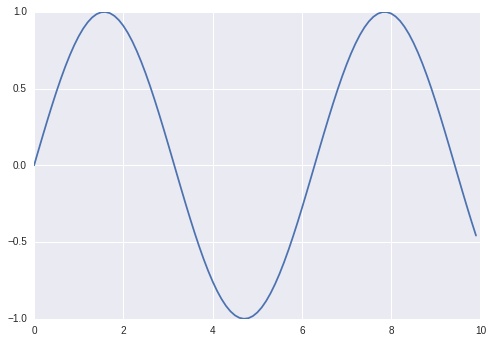

In [21]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x,y)  # pyplot function call

Another quick cheat is using the **style** module of matplotlib to change the appearance of your plots to one of their available styles. You can also create your own by customizing the style parameters. 

[u'seaborn-darkgrid', u'seaborn-notebook', u'seaborn-muted', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'classic', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


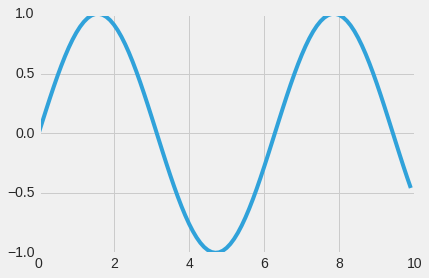

In [29]:
# List of available styles
print plt.style.available

# Set the style to nate silver clone
plt.style.use('fivethirtyeight')
plt.plot(x,y)  # pyplot function call
# Set the style back to default seaborn
plt.style.use('seaborn-darkgrid')

# Bonus - secret desu
# plt.xkcd()
# plt.rcdefaults()  # for after

### Figure and Plots ###

The parent object for matplotlib graphics is the figure. The figure contains one or more subplots which graphing commands are drawn to. When pyplot graphing commands are called without specifying a plot they will automatically draw to the last plot created. If no plot or figure has been created default ones will be generated. Multiple calls to the same subplot will result in multiple things being drawn to that subplot.

There are several ways to manage multiple figures. My preferred method is to assign figures and subplots to variables when they are created and use their native matplotlib methods to interact with them. 

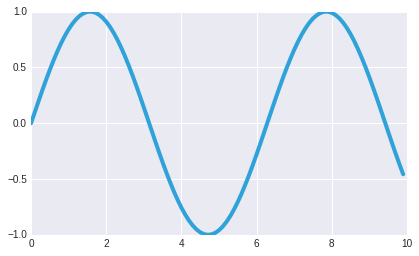

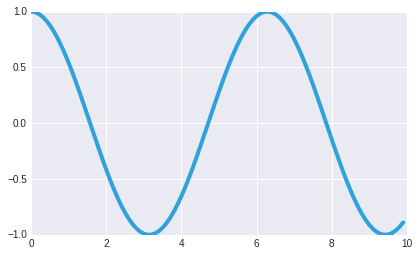

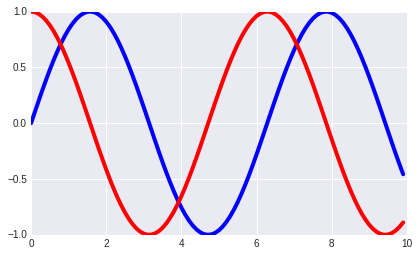

In [31]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Default figure
x = np.arange(0, 10, 0.1)
plt.plot(x, np.sin(x))

# New figure created in global namespace
plt.figure()
x = np.arange(0, 10, 0.1)
plt.plot(x, np.cos(x))

# New figure and subplot assigned to variables
# a more manageable method
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
x = np.arange(0, 10, 0.1)
# Draw multiple things to our plot
ax1.plot(x, np.sin(x),'b')
ax1.plot(x, np.cos(x),'r')

### Subplots ###
A figure may contain any number of subplots which are created using the **add_subplot()** method of a figure. This method takes 3 numeric arguents. The first two are the dimensions of the figure, for instance **add_subplot(2,3,1)** would create a total of 6 spaces for subplots in a 2x3 grid. The last number specifies which subplot we are creating using a numbering scheme of 1-N starting at the top-left and going to the bottom-right. There is also a convenience function **subplots()** which combines the creation of a figure and an array of subplots.

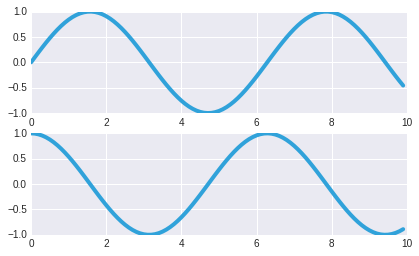

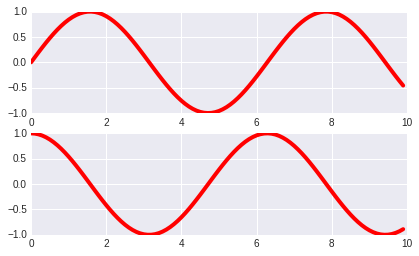

In [32]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig1 = plt.figure()
# Create subplots for that figure
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig1.add_subplot(2,1,2)

# Draw to our subplots
x = np.arange(0, 10, 0.1)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# bonus - the same code using subplots()
fig, axes = plt.subplots(2,1)
axes[0].plot(x, np.sin(x), color='r')
axes[1].plot(x, np.cos(x), color='r')

### Titles, Axis Labels, Ticks, Tick Labels ###
The main components of matplotlib graphics we'll wish to customize are the graph title and axes title. Additionally we may also wish to set the ticks (the labelled numeric intervals) and the tick labels. I will again be showing you the more explicit matplotlib method for doing this but there is also a pyplot interface.

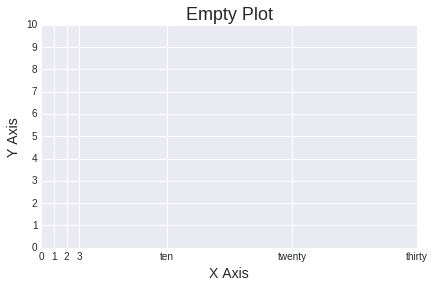

In [35]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)

# Set a title for the subplot
ax1.set_title('Empty Plot', fontsize=18)

# Set an x and y axis lable
ax1.set_xlabel('X Axis', fontsize=14)
ax1.set_ylabel('Y Axis', fontsize=14)

# Set ticks for one of our axes
# ticks must take the form of a list of numeric values
ax1.set_xticks([0,1,2,3,10,20,30])

# Set the labels for our axis ticks
ax1.set_xticklabels([0,1,2,3,'ten','twenty','thirty'])

# Bonus - arange() is an excellent way to explicitly set the range and intervals for your graphs
ax1.set_yticks(np.arange(0,11,1))

### Line Styles, Markers, Line Colors ###

For graphing multiple sets of data in a visually pleasing and easily interpretable way we will often want to specify a color, markers and line type. These are considered properties of the individual line or graphic drawn, not the figure or the subplot so they are specified as arguments to the plotting function. Matplotlib can take both explicit arguments such as " color='r' " or a string which will be interpreted as a specification for rendering the line.

#### Possible Arguments ####

-[Color](http://matplotlib.org/api/colors_api.html)

-[Line Styles](http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle)

-[Markers](http://matplotlib.org/api/markers_api.html)

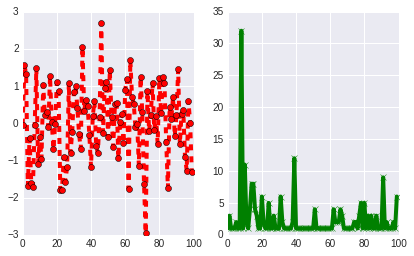

In [36]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create two subplots with line formatting using explicit arguments or abreviated form
fig, axes = plt.subplots(1,2)
x = np.arange(0, 100, 1)
# Draw a different type of noise to each subplot

# Explicit 
axes[0].plot(x, np.random.standard_normal(size=100), color='r', marker='o',linestyle='--')
# Abreviated
axes[1].plot(x, np.random.zipf(2.0,size=100), 'g-x')

### Legends ###
There are a couple ways to create legends with matplotlib, I will again show you the most explicit one. Each call to the plotting functions may optionally contain a 'label' argument with a name for that line or element. Calling the **legend()** method of your plot object will automatically create a legend using those labels. 

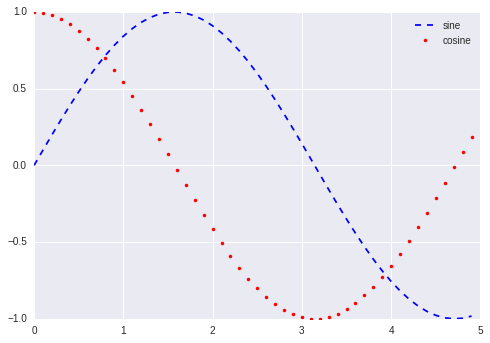

In [3]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)

x = np.arange(0, 5, 0.1)
ax1.plot(x, np.sin(x),'--b', label='sine')
ax1.plot(x, np.cos(x),'.r', label='cosine')
ax1.legend()

### Other Common Graph Types ###

Matplotlib supports all the commonly used graph types such as historgrams, scatter plots and etc. For this section we'll start applying what we've learned so far and demonstrate each using a real dataset. The nerdy personality traits inventory, a personality inventory of nerdy traits that also includes demographic information and some other common personality measures.

In [39]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import a csv with data for the npas
# uh-oh looks like some participants included commas in their free response section
# that messed up our columns for the csv so lets exclude them
bad_participants = [27,43,53,68,177,258,666,687,718,725,771,813,\
                    842,1006,1094,1095,1132,1159,1182,1189,1225,\
                    1238,1288,1333,1339,1350,1409]
npas = pd.read_csv('./data/NPAS-data/NPAS-data.csv',skiprows=bad_participants)

#### Bar Plots ####

Bar plots are a simple representation of the relative values of different variables. To create a bar graph we use the matplotlib method bar() or barh() for horizontal bar graphs. Bar graphs require two lists (or arrays/series) of values with several optional parameters to control the appearance of the graph. Bar graphs can require a lot of manual tweaking.

**Left** - x coordinates for the left side of bars

**Height** - the heights of the bars

**Width(optional)** - the width of the bars as a scalar or array if each bar needs different widths (default 0.8)

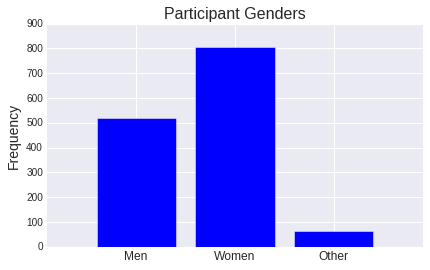

In [40]:
# Create a single plot
fig, ax = plt.subplots(1,1)

# Get counts of men, women and other genders
men = len(npas['gender'][npas['gender']==1])
women = len(npas['gender'][npas['gender']==2])
other = len(npas['gender'][npas['gender']==3])
# Store in a list
genders = [men,women,other]

# Create a bar graph of the gender numbers for the NPAS
ax.bar(left=[1,2,3],height=genders, width=0.8)

# Set the xlim, xticks, and ticklabels to make it prettier
ax.set_xlim([0.5,4.3])
ax.set_xticks([1.4,2.4,3.4])
ax.set_xticklabels(['Men', 'Women', 'Other'], fontsize=12)

# Add appropriate labels to our graph
ax.set_title('Participant Genders', fontsize=16)
ax.set_ylabel('Frequency', fontsize=14)

#### Histograms ####

Histograms are a representation of the binned frequency of values in a single vector of data. To create a histogram we can use the **hist()** method and pass the number of bins to be used. The exact limits for each bin will be determined automatically.

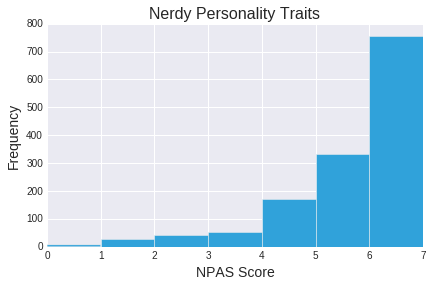

In [41]:
# Create a single plot
fig, ax = plt.subplots(1,1)

# Display a histogram of the 'nerdy' values in our data column
# these values represent the total nerdy score from this personality inventory
# the range is 1-7 so we use 7 bins
ax.hist(npas['nerdy'],bins=7)

# Add appropriate labels to our graph
ax.set_title('Nerdy Personality Traits', fontsize=16)
ax.set_xlabel('NPAS Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

#### Scatter Plots ####

Scatter plots are a representation of the relationship between two variables. We can create these using the Matplotlib **scatter()** method. Lets look at the relationship of two continuous variables, the time elapsed during the test and the time elapsed during the survey. 

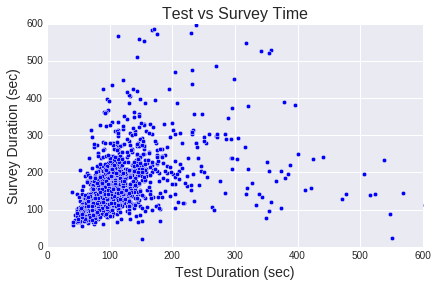

In [42]:
# Create a single plot
fig, ax = plt.subplots(1,1)

# Scatter of x vs y
ax.scatter(npas['testelapse'], npas['surveyelapse'])

# We have some extreme outliers lets set our axes range to something reasonable (10 minutes)
ax.set_xlim([0,10*60])
ax.set_ylim([0,10*60])

# Add appropriate labels to our graph
ax.set_title('Test vs Survey Time', fontsize=16)
ax.set_xlabel('Test Duration (sec)', fontsize=14)
ax.set_ylabel('Survey Duration (sec)', fontsize=14)

#### Box Plots ####

Box plots also called box and whisker plots display the quartiles of a distribution of values in visual form. The NPAS survey contains a ten item personality inventory, lets use box plots to visualize the distribution of these traits.

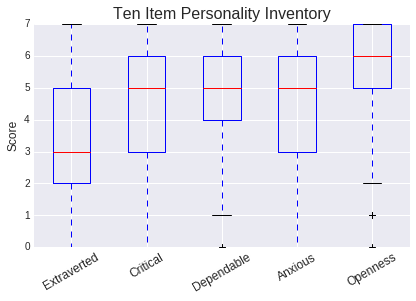

In [43]:
# Create a figure with one subplot
fig, ax = plt.subplots(1,1)

# Graph the first five personality items using boxplots
personalityData1 = [npas['TIPI1'], npas['TIPI2'], npas['TIPI3'], npas['TIPI4'], npas['TIPI5']]
ax.boxplot(personalityData1, vert=True)

# Add appropriate labels to our graph
ax.set_title('Ten Item Personality Inventory', fontsize=16)
ax.set_ylabel('Score', fontsize=12)
personalityLabels1 = ['Extraverted','Critical','Dependable','Anxious','Openness']
ax.set_xticklabels(personalityLabels1, fontsize=12, rotation=30)

#### Violin Plots ####

Violin plots are boxplots but with a kernel density estimation of the values frequency added to give additional information about the distribution. Lets demonstrate them with the last five personality traits.

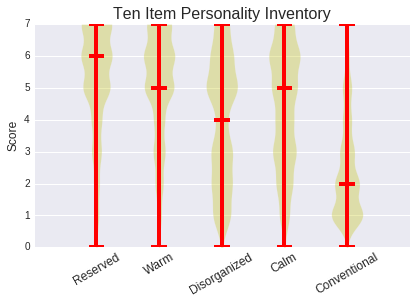

In [44]:
# Create a figure with one subplot
fig, ax = plt.subplots(1,1)

# Graph the first five personality items using boxplots
personalityData2 = [npas['TIPI6'], npas['TIPI7'], npas['TIPI8'], npas['TIPI9'], npas['TIPI10']]
ax.violinplot(personalityData2, vert=True, showmedians=True)

# Add appropriate labels to our graph
ax.set_title('Ten Item Personality Inventory', fontsize=16)
ax.set_ylabel('Score', fontsize=12)
personalityLabels1 = ['','Reserved','Warm','Disorganized','Calm','Conventional']
ax.set_xticklabels(personalityLabels1, fontsize=12, rotation=30)

### Graphing Resources ###

Python has extensive support for different types of visualization. The basic matplotlib graphs we've gone through so far should be enough to get you started but there are a lot more graph types and advanced graphing libraries available. Most of these are beyond the scope of this tutorial but here is a list of some of what is available.

[Seaborn](http://seaborn.pydata.org/index.html) -  Improved graph appearance and some extra functionality

[Bokeh](http://bokeh.pydata.org/en/latest/) - D3.js style interactive graphs for the web

[Animation](http://matplotlib.org/api/animation_api.html) - Animated graphs using matplotlib

[Basemap](http://matplotlib.org/basemap/) - Lightweight geographical visulization library

[MPlot3D](http://matplotlib.org/mpl_toolkits/mplot3d/index.html) - Matplotlib 3D toolkit, adds basic 3d plotting

[DataShader](https://github.com/bokeh/datashader) - Graphics rendering for VERY large datasets

[ggplot](https://pypi.python.org/pypi/ggplot) - Grammar of Graphics clone if you like that sort of thing

## [Statistics with Numpy and Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) ##

Statistics and mathematical functions for scientific python are mostly spread between Numpy and a library called scipy. As we've already seen numpy has many useful mathematical and statistical functions for working with nd-arrays of data. Scipy is an add on library of scientific tools and functions which are also built to work with numpy data structures. This means they will generally use matrix operations, and require numpy nd-arrays or at least uniform data types that can be converted to numpy nd-arrays as input. Generally speaking simple functions like mean() median() will be found in numpy but statistical tests like anovas and regressions will be in the scipy.stats library. For this section lets quickly go over some of the common statistical tests and how to do them with python. We will again be using real data from the nerdy personality attributes inventory.

### Descriptive Statistics ###

The basic descriptive statistics such as mean, standard deviation are available in numpy and some of the more advanced ones such as kurtosis, skewness, percentile and etc. are available in scipy. I'll assume you already have some statistical training so I'm just going to show you how to do some of these in python not what they are. Note that many of these functions may be given multi-dimensional matrices of values as input and so return arrays of values even when only a single vector of values is passed to them.

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Import our csv with data for the npas again
bad_participants = [27,43,53,68,177,258,666,687,718,725,771,813,\
                    842,1006,1094,1095,1132,1159,1182,1189,1225,\
                    1238,1288,1333,1339,1350,1409]
npas = pd.read_csv('./data/NPAS-data/NPAS-data.csv',skiprows=bad_participants)

# Ages of all participants as a numpy nd-array
ages = npas['age']

In [49]:
# Measures of Centrality
# Mean
mean = np.mean(ages)
# Median
med = np.mean(ages)
# Mode - returns an array of modes and their counts for each axis in a matrix
mods, counts = stats.mode(ages)
print 'Mean = {} Median = {} Mode = {}'.format(mean, med, mods[0])

# Measures of Variance
# Variance
var = np.var(ages)
# Standard Deviation
std = np.std(ages)
print 'Variance = {} STD = {}'.format(var, std)

# Bonus
# Scipy stats also has a convenience function describe() which returns a number of common descriptive stats for an array
n, minmax, mean, var, skew, kurt = stats.describe(ages)
print 'n={} min/max={} mean={} var={} skew={} kurt={}'.format(n, minmax, mean, var, skew, kurt)

Mean = 54.3587347232 Median = 54.3587347232 Mode = 18.0
Variance = 1081416.74047 STD = 1039.91189072
n=1391 min/max=(14, 38822) mean=54.3587347232 var=1082194.73812 skew=37.2469772837 kurt=1385.55857963


### T-Tests ###

### One Sample T-Test ###

[ttest_1samp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)

**Arguments:** array, population mean, axis(optional), nan_policy(optional)

**Returns:** t-statistic, p-value (two-tailed)

Performs a t-test between an array of values and a designated mean value returns the t-stat and a two tailed p-value.

In [50]:
# Test the hypothesis that average familysize is 2 in our sample
t, p = stats.ttest_1samp(npas['familysize'],2)
print 't={:.2f} p={:.8f}'.format(t,p)

t=14.69 p=0.00000000


### Independent Samples T-Test ###

[ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

**Arguments:** array1, array2, axis(optional), equal_var(boolean, optional), nan_policy(optional)

**Returns:** t-statistic, p-value (two-tailed)

Performs an independent samples t-test between two arrays of values. By default it will assume equal population variances but you may change the equal_var argument to false which will cause scipy to use Welch's T-test. 

In [51]:
# Get The Nerdy scores for men and women
m_nerd = npas['nerdy'][npas['gender']==1]
f_nerd = npas['nerdy'][npas['gender']==2]

# Test the hypothesis that women and men have an equal mean nerdy attributes score
t, p = stats.ttest_ind(m_nerd, f_nerd)
print 't={:.2f} p={:.8f}'.format(t,p)

t=-1.70 p=0.09004850


### Related Samples T-Test ###

[ttest_rel()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

**Arguments:** array1, array2, axis(optional), nan_policy(optional)

**Returns:** t-statistic, p-value (two-tailed)

Performs a dependent samples t-test between two arrays of values. This should be used when you are testing between values from related populations such as paired-samples or repeated measures designs where you are not testing between two independent populations. 

In [52]:
# Get The 'Reserved' and 'Anxious' scores for all subjects
anx = npas['TIPI4']
res = npas['TIPI6']

# Test the hypothesis that mean reservation and anxiety have the same average values within subjects
t, p = stats.ttest_rel(anx, res)
print 't={:.2f} p={:.8f}'.format(t,p)

t=-11.01 p=0.00000000


### Chi Square ###
 
[chisquare()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)

**Arguments:** observed frequencies, expected frequencies(optional), axis(optional), delta degrees of freedom (optional)

**Returns:** chi-square statistic, p-value

Performs a one way chi-square test. Takes an array of frequencies as an argument, optionaly takes a second array of expected frequencies to test against, the default is that each category is equally likely. Can also be passed a degree of freedom adjustment which will decrease the DF by an integer amount. 

In [53]:
# Get the frequencies of male and female participants
men_f = np.sum(npas['gender']==1) # remember booleans are integers
fem_f = np.sum(npas['gender']==2)

# Test the hypothesis that men and women are equally frequent in the sample
chi, p = stats.chisquare([men_f,fem_f])
print 'chi={:.2f} p={:.8f}'.format(chi,p)

chi=61.21 p=0.00000000


### One Way Anova ###

[f_oneway()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

**Arguments:** sample measurements for each group (sample1, sample2.. sampleN)

**Returns:** F statistic, p-value

Performs a one way anova test.

In [54]:
# Get the nerdiness scores for each coded response to the sexual orientation question
# 1 = heterosexual, 2=bisexual, 3=homosexual, 4=asexual, 5=other
samples = [ npas['nerdy'][npas['orientation']==x] for x in range(1,5,1)]

# Test the hypothesis that all orientation groups have an equal nerdy attributes score
f, p = stats.f_oneway(*samples)
print 'f={:.2f} p={:.8f}'.format(f,p)

f=11.05 p=0.00000036


### Linear Regression ###

There are many types of regressions and I would say this is a little bit of a weak point for scientific python. While tools do exist for doing multiple regressions, hierarchical regressions, logistic regressions and etc. they are not as straightforward to use as comparable tools in R, Matlab and etc. For now we'll skip those more advanced topics and just show you how to do a normal two variable least-squares regression.

### OLS Regression ###

[linregress()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

**Arguments:** x, y (two sets of sample measurements, must be of same length)

**Returns:** slope, intercept, r-value, pvalue, stderr

Performs an ordinary least squares regression between two variables.

In [55]:
# Get the age and nerdiness scores for all subjects
ages = npas['age']
nerd = npas['nerdy']

# Test the hypothesis that there exists a linear relationship between nerdy personality
# attributes + age and calculate the slope and intercept for that possible relationship
slope, inter, r, p, stderr = stats.linregress(ages, nerd)
print 'nerd = {:.8f} x age + {:.2f}'.format(slope, inter)
print 'r={:.8f}, p={:.8f}, stderr={:.8f}'.format(r,p,stderr)

nerd = 0.00001550 x age + 5.36
r=0.01118619, p=0.67679593, stderr=0.00003718


#### Graphing #### 

Generally we'll want to graph the regression lines for any linear models we make. There are several ways to do this but the simplest and most versatile is to use the equation of our regression line and the plot command to overlay a line on the scatter plot of values. Recall that the plot command takes two numpy arrays for the x and y values of the line. We can grab the x-tick values for the x-axis and multiply them by our models values to display a regression line that will always fit the graph even if we resize it.

Lets test a dumb hypothesis with our data and then graph it. Are older people on average slower at these sorts of tests?

*note: unlike other methods this will also work for any sort of nonlinear regression*

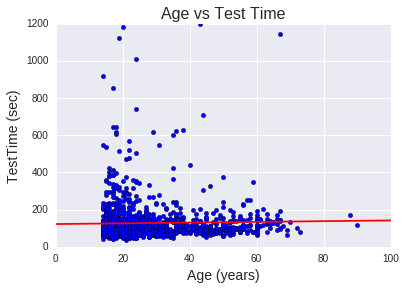

In [28]:
%matplotlib inline
# Someone claimed to be 30,000 years old so lets manually remove outliers age > 100, time > 20 minutes
npas_clean = npas[npas['age']< 100]
npas_clean = npas_clean[npas_clean['testelapse']< 60*20]

# Make our scatter plot
fig, ax = plt.subplots(1,1)
ax.scatter(npas_clean['age'], npas_clean['testelapse'])

# Add appropriate labels to our graph
ax.set_title('Age vs Test Time', fontsize=16)
ax.set_xlabel('Age (years)', fontsize=14)
ax.set_ylabel('TestTime (sec)', fontsize=14)
# Set limits
ax.set_xlim([0,100])
ax.set_ylim([0,60*20])

# Run our regression model
slope, inter, r, p, stderr = stats.linregress(npas_clean['age'], npas_clean['testelapse'])

# How to graph a regression line
# 
# Grab the x-ticks values as an array
x = ax.get_xticks()
# Create a new array of y values using our slope and intercept
y = x*slope + inter 
# Add to our plot as a solid red line
ax.plot(x,y, color='r', linestyle='-')